In [41]:
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [42]:
df = pd.read_csv("tx_stops_2010_2015.csv", encoding="ISO-8859-1")

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17,20,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [43]:
df.columns

Index(['Unnamed: 0', 'id', 'state', 'stop_date', 'stop_time', 'location_raw',
       'county_name', 'county_fips', 'fine_grained_location',
       'police_department', 'driver_gender', 'driver_age_raw', 'driver_age',
       'driver_race_raw', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type_raw', 'search_type',
       'contraband_found', 'stop_outcome', 'is_arrested', 'lat', 'lon',
       'officer_id', 'driver_race_original'],
      dtype='object')

In [44]:
df = df[df.county_name == 'Harris County']

## Baseline Stats: Harris County

In [45]:
print(100*df.search_conducted.dropna().astype(int).mean(), 100*df.search_conducted.dropna().astype(int).std())

1.26272103934 11.1659343294


In [46]:
print(100*df.contraband_found.dropna().astype(int).mean(), 100*df.contraband_found.dropna().astype(int).std())

0.462650532842 6.78610152879


In [47]:
100*len(df[df.stop_outcome=='Citation'])/len(df)

48.689323716294965

In [48]:
100*len(df[df.driver_gender=='M'])/len(df)

64.9731009175636

In [49]:
100*len(df[df.driver_race=='White'])/len(df)

36.45357878670886

In [50]:
100*len(df[df.driver_race=='Black'])/len(df)

24.382006660725175

In [51]:
100*len(df[df.driver_race=='Hispanic'])/len(df)

30.82587940695732

In [52]:
100*len(df[df.driver_race=='Asian'])/len(df)

4.878277592757634

In [53]:
100*len(df[df.driver_race=='Other'])/len(df)

0.2500478085636864

In [54]:
100*len(df[df.driver_race.isnull()])/len(df)

3.2102097442873276

In [55]:
## Stats on Searches and Contraband Recovered, % Citations by Race

In [56]:
df1 = df[df.driver_race == 'White']
print(100*df1.search_conducted.dropna().astype(int).mean(), 100*df1.search_conducted.dropna().astype(int).std())
print(100*df1.contraband_found.dropna().astype(int).mean(), 100*df1.contraband_found.dropna().astype(int).std())
print(100*len(df1[df1.stop_outcome=='Citation'])/len(df1))

1.04439934663 10.1661294397
0.388061179033 6.2173876427
43.30198950806691


In [57]:
df2 = df[df.driver_race == 'Black']
print(100*df2.search_conducted.dropna().astype(int).mean(), 100*df2.search_conducted.dropna().astype(int).std())
print(100*df2.contraband_found.dropna().astype(int).mean(), 100*df2.contraband_found.dropna().astype(int).std())
print(100*len(df2[df2.stop_outcome=='Citation'])/len(df2))

1.81468324452 13.3483289779
0.648312611012 8.02570278933
46.80202444727262


In [58]:
df3 = df[df.driver_race == 'Hispanic']
print(100*df3.search_conducted.dropna().astype(int).mean(), 100*df3.search_conducted.dropna().astype(int).std())
print(100*df3.contraband_found.dropna().astype(int).mean(), 100*df3.contraband_found.dropna().astype(int).std())
print(100*len(df3[df3.stop_outcome=='Citation'])/len(df))

1.2210398155 10.9824612611
0.443700391018 6.64632877701
17.750147033884545


In [59]:
100*len(df[(df.driver_race_original == 'White') & (df.driver_race == 'Hispanic')]) / len(df)

9.248882362067784

In [60]:
len(df[(df.driver_race_original == 'White') & (df.driver_race == 'Hispanic')])

25633

In [61]:
#Finding IDs of cops who had more than 100 stops
df_filt = df.groupby("officer_id").count()
df_filt['id'] = df_filt.index
df_filt.head()
ids = np.asarray(df_filt.id[df_filt.state >= 100].astype(str))

In [62]:
df_search = df[df.search_conducted == True]
df_search = df[(df.driver_race == 'Hispanic') | (df.driver_race == 'Black')].groupby("officer_id").count()
df_filt['id'] = df_filt.index
df_filt.head()
ids1 = np.asarray(df_filt.id[df_filt.state >= 20].astype(str))

In [63]:
ids_filt = np.intersect1d(ids,ids1)

In [64]:
ids_filt.shape

(171,)

In [65]:
df.officer_id = df.officer_id.astype(str)
df_filt = df[df.officer_id.isin(ids_filt)]
df_filt = df[df.search_conducted == True]
df_filt.contraband_found = df_filt.contraband_found.fillna(0).astype(int)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [66]:
df_black_hispanic = df_filt[(df_filt.driver_race == 'Hispanic') | (df_filt.driver_race == 'Black')]
df_white = df_filt[(df_filt.driver_race == 'White')]

In [67]:
df_black_hispanic = df_filt[(df_filt.driver_race == 'Hispanic') | (df_filt.driver_race == 'Black')]
df_white = df_filt[(df_filt.driver_race == 'White')]

df_b_h_GB = df_black_hispanic.groupby('officer_id').count()
df_white_GB = df_white.groupby('officer_id').count()

df_b_h_GB['MinoritySearches'] = df_b_h_GB.id
df_b_h_GB = pd.DataFrame(df_b_h_GB['MinoritySearches'])
df_white_GB['WhiteSearches'] = df_white_GB.id
df_white_GB = pd.DataFrame(df_white_GB.WhiteSearches)

df_search = pd.merge(df_b_h_GB, df_white_GB, left_index=True, right_index=True)

df_search["MinorityWhiteSearchRatio"] = df_search.MinoritySearches/df_search.WhiteSearches

In [68]:
len(df_search[df_search.MinorityWhiteSearchRatio > 2])/len(df_search)

0.4589041095890411

In [69]:
len(df_search[df_search.MinorityWhiteSearchRatio > 3])/len(df_search)

0.21232876712328766

In [70]:
len(df_search[df_search.MinorityWhiteSearchRatio > 4])/len(df_search)

0.1095890410958904

(array([ 17.,  48.,  39.,  16.,  12.,   4.,   3.,   2.,   1.,   3.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

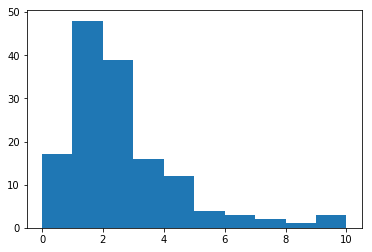

In [71]:
plt.hist(df_search.MinorityWhiteSearchRatio, bins=[0,1,2,3,4,5,6,7,8,9,10])

(array([  17.,   65.,  104.,  120.,  132.,  136.,  139.,  141.,  142.,  145.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

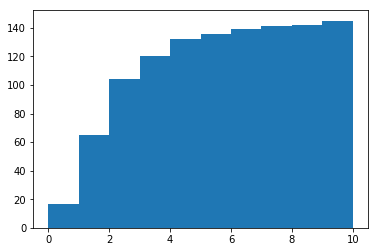

In [72]:
plt.hist(df_search.MinorityWhiteSearchRatio, bins=[0,1,2,3,4,5,6,7,8,9,10], cumulative=True)

In [76]:

df_b_h_C_GB = pd.DataFrame(df_black_hispanic.groupby('officer_id')['contraband_found'].sum())
df_white_C_GB = pd.DataFrame(df_white.groupby('officer_id')['contraband_found'].sum())
df_white_C_GB['WhiteContrabandRecovered'] = df_white_C_GB.contraband_found
df_b_h_C_GB['MinorityContrabandRecovered'] = df_b_h_C_GB.contraband_found
df_contraband = pd.merge(df_b_h_C_GB, df_white_C_GB, left_index=True, right_index=True)

df_contraband["MinorityWhiteContrabandRatio"] = df_contraband.MinorityContrabandRecovered/df_contraband.WhiteContrabandRecovered

In [84]:
df_contraband_search = pd.merge(df_contraband, df_search, left_index=True, right_index=True)

#### Statesman Methodology

To compare search rates by race, we looked at individual troopers who had at least 100 stops and 20 searches of either black or Hispanic motorists, and then compared the number of searches to stops to get a search rate for that race. We did the same for their stops of white motorists, and then divided the rates to get a ratio of minority stops. For contraband hit rates, we compared the number of positive contraband results to the total number of searches by race for each trooper. DPS misidentified many Hispanic motorists as Anglo during the period studied, meaning the paper’s conclusions are most likely conservative.

35 percent of the 1,138 troopers included in the analysis searched black and Hispanic motorists at least twice as often as white drivers.

231 of the officers who searched black and Hispanic motorists at two times or more the rate at which they searched white drivers were less likely to find contraband while searching the minority drivers.

65 DPS officers searched minority drivers at least three times more often than the white motorists they stopped yet found contraband less often.

16 officers searched minority motorists more than four times as often as Anglos, with lower contraband hit rates.

#### Our Version of Their Stats
To compare search rates by race, we looked at individual troopers who had at least 100 stops and 20 searches of either black or Hispanic motorists, and then compared the number of searches to stops to get a search rate for that race. We did the same for their stops of white motorists, and then divided the rates to get a ratio of minority stops. For contraband hit rates, we compared the number of positive contraband results to the total number of searches by race for each trooper. DPS misidentified many Hispanic motorists as Anglo during the period studied, meaning the paper’s conclusions are most likely conservative.

46 percent of the 146 troopers included in the analysis searched black and Hispanic motorists at least twice as often as white drivers.

31 of the officers who searched black and Hispanic motorists at two times or more the rate at which they searched white drivers were less likely to find contraband while searching the minority drivers (46% of the 46% above).

31 DPS officers searched minority drivers at least three times more often than the white motorists they stopped, 12 found contraband less often (39%)

16 officers searched minority motorists more than four times as often as Anglos, 5 with lower contraband hit rates (30%)

In [113]:
df_contraband_search['MinorityHitRate'] = df_contraband_search.MinorityContrabandRecovered/df_contraband_search.MinoritySearches
df_contraband_search['WhiteHitRate'] = df_contraband_search.WhiteContrabandRecovered/df_contraband_search.WhiteSearches

In [114]:
df_contraband_search['HitRateDiff'] = df_contraband_search['WhiteHitRate'] - df_contraband_search.MinorityHitRate

In [116]:
df_contraband_search_2 = df_contraband_search[df_contraband_search.MinorityWhiteSearchRatio > 2]
df_contraband_search_3 = df_contraband_search[df_contraband_search.MinorityWhiteSearchRatio > 3]
df_contraband_search_4 = df_contraband_search[df_contraband_search.MinorityWhiteSearchRatio > 4]
print(len(df_contraband_search_2[df_contraband_search_2.HitRateDiff > 0])/len(df_contraband_search_2),\
len(df_contraband_search_3[df_contraband_search_3.HitRateDiff > 0])/len(df_contraband_search_3),\
len(df_contraband_search_4[df_contraband_search_4.HitRateDiff > 0])/len(df_contraband_search_4))

0.4626865671641791 0.3870967741935484 0.3125


In [117]:
print(len(df_contraband_search_2[df_contraband_search_2.HitRateDiff > 0]),\
     len(df_contraband_search_3[df_contraband_search_3.HitRateDiff > 0]),\
    len(df_contraband_search_4[df_contraband_search_4.HitRateDiff > 0]))

31 12 5


In [121]:
print(len(df_contraband_search_4))

16
